In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import Joint, SegmentList
from trajectory.plot import *
import matplotlib.pyplot as plt
from copy import deepcopy
import pandas as pd
import numpy as np

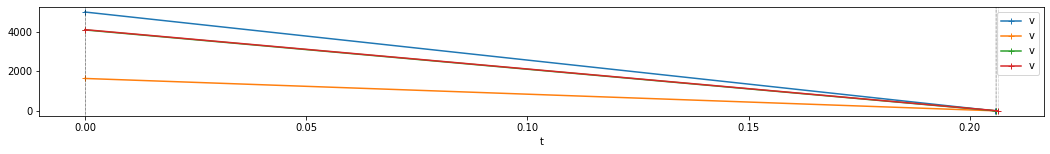

In [2]:
# Failed to converge in planning due to small segments. added halving
# v_0 when block is too long post-planning to fix. 
from trajectory.planner import Segment, Joint

j = Joint(5_000, 50_000)

block_params = [
 (379, 4998, 0),
 (110, 3277, 0),
 (771, 4092, 0),
 (275, 4107, 0)]

blocks = [j.new_block(*bp) for bp in block_params]
s = Segment(0,blocks).init()
s.plan()
s.plot()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


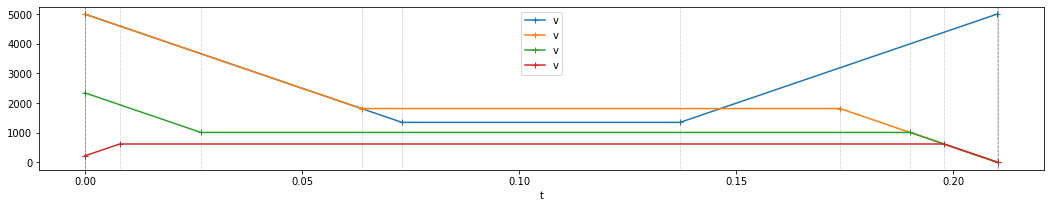

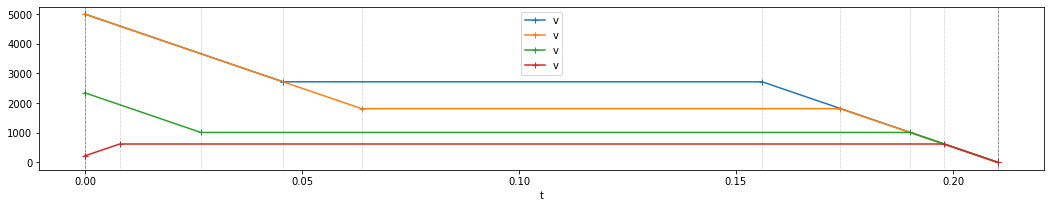

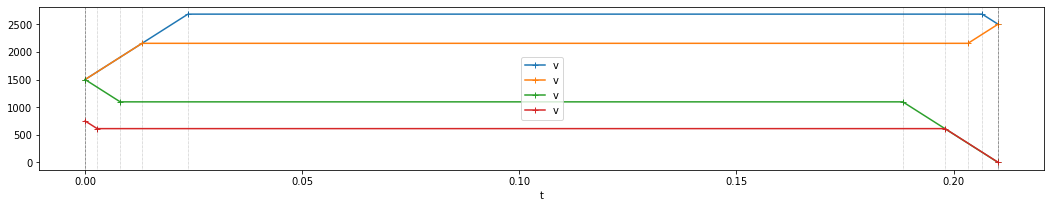

In [13]:
# Too many planning updates for sid=1.
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import Joint, SegmentList
from trajectory.plot import *
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*4
sl = SegmentList(joints)   

sl.move([550, 450, 220, 125])
#sl.move([141, 76, -475, 391])


sl[0].plan(v_0=j.v_max, v_1=j.v_max)
sl.plot()
sl[0].plan(v_0=j.v_max, v_1=0)
sl.plot()
sl[0].plan(v_0=1500, v_1=2500)
sl.plot()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


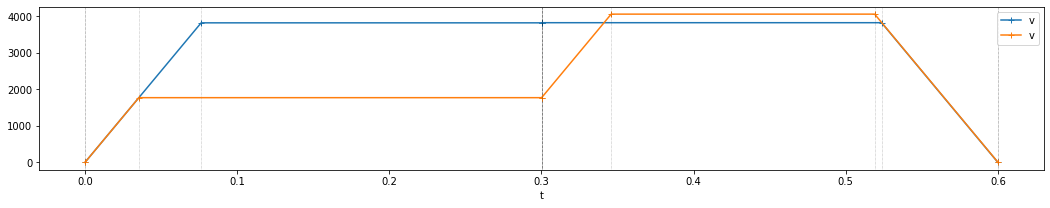

In [4]:
# Too many planning updates for sid=1.
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)   
s = sl.move([1000,500])
s = sl.move([1000,1000])

sl.plot()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


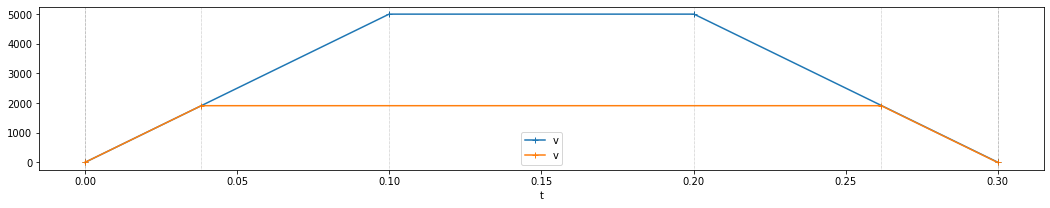

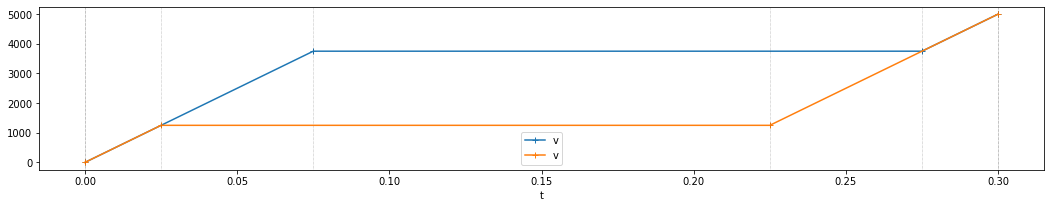

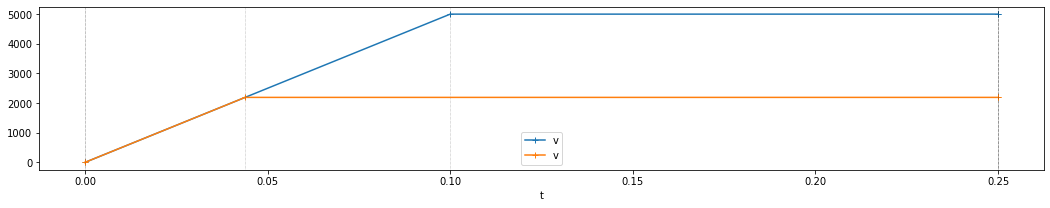

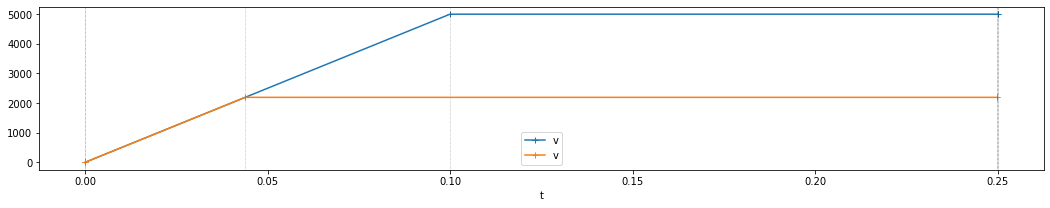

In [5]:
# Too many planning updates for sid=1.
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pylab as plt
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)   
s = sl.move([1000,500])
sl.plot(); plt.show()

s.init().plan(v_1=5_000)
sl.plot();plt.show()


s.init().plan('R')
sl.plot();plt.show()

s.init().plan('T')
sl.plot();plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[]


/Users/eric/Documents/proj/trajectory/trajectory/plot.py:56: UserWarning: Found 1 discontinuities in axis 0
  warn(f"Found {discontinuities[0]} discontinuities in axis {axis}")
/Users/eric/Documents/proj/trajectory/trajectory/plot.py:56: UserWarning: Found 1 discontinuities in axis 1
  warn(f"Found {discontinuities[0]} discontinuities in axis {axis}")


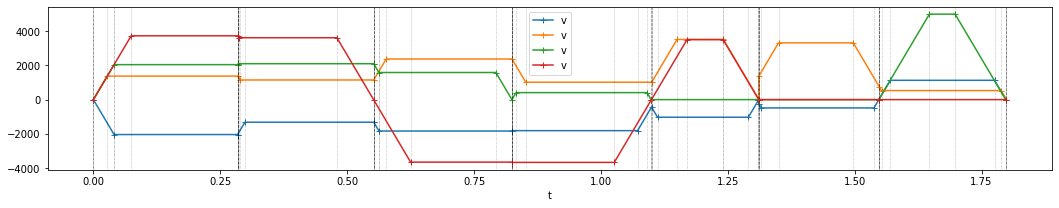

In [6]:
# Too many planning updates for sid=1.
%load_ext autoreload
%autoreload 2
%matplotlib inline

from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*4

sl = SegmentList(joints)  

sl.move([-538, 372, 539, 920])
sl.move([-359, 308, 562, 838])
sl.move([-497, 631, 409, -861])
sl.move([-479, 298, 109, -874])
sl.move([-203, 557, 0, 495])
sl.move([-112, 683, 0, 0])
sl.move([257, 130, 751, 0])

sl.plot()
print([ (c.id, round(c.v_1), round(n.v_0)) for c, n in sl.discontinuities()])

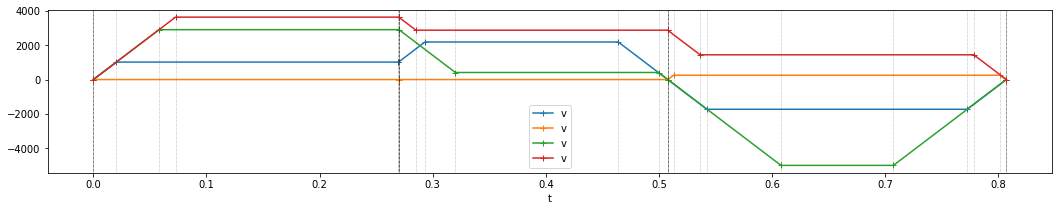

In [7]:
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*4

sl = SegmentList(joints) 

sl.move([264, 0, 700, 849])
sl.move([459, 0, 158, 689])
sl.move([-458, 74, -996, 431])

sl.plot()


Here is what the above trajectory looked like before: 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


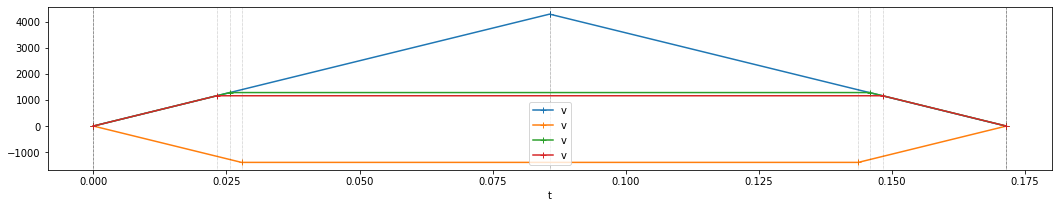

In [8]:
# Unsolvable profile. Changing the first move distance by 1 avoids the error. 
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*4
sl = SegmentList(joints)


sl.move([367, -200, 187, 172])

sl.plot()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


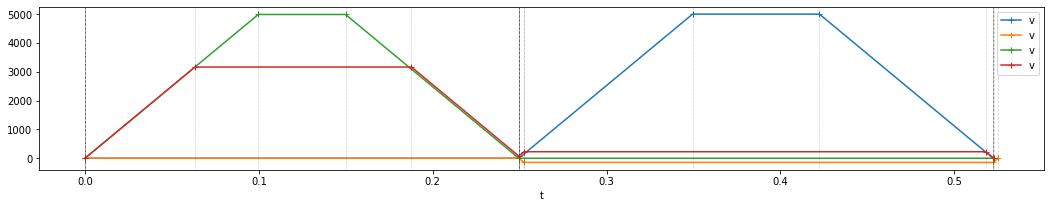

In [9]:
# Unsolvable profile. Changing the first move distance by 1 avoids the error. 
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*4
sl = SegmentList(joints)

sl.move([0, 0, 747, 594])
sl.move([864, -39, 0, 61])


sl.plot()

In [10]:
# Negative t_c after planning ramp
(tf, x, v_0, v_1) = 1.01, 500,1000,1000
j = Joint(5_000, 50_000)
self = self = j.new_block(x, v_0, v_1).init()
self.plan_ramp(self.t)
print(self)

ACDBlock(x=500, t=0.16400000000000003, t_a=0.04799999999999998, t_c=0.11600000000000006, t_d=0.0, x_a=105.59999999999994, x_c=394.4000000000001, x_d=0, v_0=1000, v_c=3399.999999999999, v_1=3399.999999999999, d=1, joint=Joint(v_max=5000, a_max=50000, small_x=250.0, max_discontinuity=10.0), segment=None, next=None, prior=None, flag='PR', recalcs=0, step_period=4)


In [11]:
%reload_ext autoreload
%autoreload 2
%run startup.py

from trajectory.planner import Joint, SegmentList
from trajectory.plot import *
from random import random, randint
from IPython .display import Markdown

j = Joint(5_000, 50_000)
n = 4
joints = [j]*n
signs = [1]*n


test_moves = [
[[347, 379, 316, 66], [373, 883, 0, 328], [578, 537, -762, 641], [66, 232, -616, 590], [246, 0, -611, 134]],
[[798, 453, 0, 232], [474, 657, 0, 576], [0, -758, 330, 992], [-184, 371, 497, 597], [33, 248, 15, 576]],
[[-634, 0, 970, 359], [-299, 0, 70, 795], [637, 0, 549, 33], [950, -803, 237, 199], [0, -139, 224, -760]],
[[-334, -425, 0, -992], [-449, -827, -920, 0], [-499, -978, 465, -963], [-394, -657, 777, 0], [-903, -430, 45, -977]],
[[-619, -980, 340, -698], [-428, -162, 781, -76], [-313, -44, 0, -531], [295, 90, 934, -743], [781, 728, 734, -336]],
[[0, 652, 0, -239], [-505, 393, -382, -747], [-103, 342, -911, -881], [-451, 391, -946, -97], [-832, 715, -498, -427]],
]
    
def f(sl, move_sets):
    for i, moves in list(enumerate(move_sets)):
        sl.move(moves)
        

for i,moves in enumerate(test_moves):
    sl = SegmentList(joints)  
    f(sl, moves)
    ds = list(sl.discontinuities())
    if len(ds):
        display(Markdown(f'## {len(ds)} Discontinuities'))
        display(i,moves)
        df = sl.dataframe
        sl.plot(); plt.show()
        display([ (c.id, round(c.v_1), round(n.v_0)) for c, n in ds])

<Figure size 432x288 with 0 Axes>

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


0.0000|[0        232↗   536@4817  ↘231      197] [0        249↗   501@4993  ↘249        0]
0.0000|[197        0↗    98@337   ↘1          0] [0       -249↗  -501@4993  ↘-249       0]
0.0000|[0        249↗   501@4996  ↘249        0] [0        249↗   501@4996  ↘249        0]

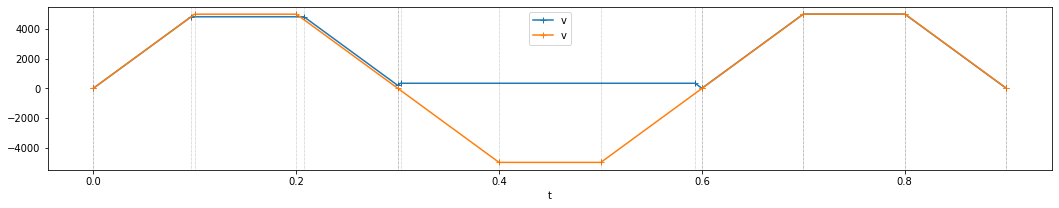

In [19]:
# Too many planning updates for sid=1.
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)   
s = sl.move([1000,1000])
s = sl.move([100,-1000])
s = sl.move([1000,1000])

sl.plot()
sl

In [18]:
[str(b) for b in sl[0].blocks]

['ACDBlock(x=5000, t=1.1000799084504875, t_a=0.09999112215909092, t_c=0.9000976641323055, t_d=0.09999112215909092, x_a=249.95561276585607, x_c=4500.088774468288, x_d=249.95561276585607, v_0=0, v_c=4999.556107954546, v_1=0, d=1, joint=Joint(v_max=5000, a_max=50000, small_x=250.0, max_discontinuity=10.0), segment=<trajectory.planner.Segment object at 0x7fe530a11070>, recalcs=0, step_period=4)',
 'ACDBlock(x=1000, t=1.0994995010687492, t_a=0.018501420454545454, t_c=1.0624966601596582, t_d=0.018501420454545454, x_a=8.557563970896823, x_c=982.8848720582064, x_d=8.557563970896823, v_0=0, v_c=925.0710227272726, v_1=0, d=1, joint=Joint(v_max=5000, a_max=50000, small_x=250.0, max_discontinuity=10.0), segment=<trajectory.planner.Segment object at 0x7fe530a11070>, recalcs=0, step_period=4)']